# loading R 

In [1]:
%load_ext rpy2.ipython

# loading CSV file

In [2]:
import pandas as pd

df = pd.read_csv('./data/qualtrics/Topic_Item_Assessment_June+8,+2024_17.22.csv').iloc[2:].reset_index().drop(columns=['index'])
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,doc5,model,topic_id,NPMI,usefulness_first,slider,slider_lower,slider_upper,neg_val_question,neg_val_text
0,2024-06-07 08:28:36,2024-06-07 08:44:05,IP Address,47.158.135.200,100,929,True,2024-06-07 08:44:06,R_6eXNpu5GWc8YphS,NaN,...,1:54am im getting sick. probably caught somet...,scholar,2,-0.0099138039220776,False,seventy,66,79,expect,I would<strong> not expect</strong> to see the...
1,2024-06-07 08:35:36,2024-06-07 08:48:06,IP Address,38.49.94.15,100,750,True,2024-06-07 08:48:07,R_3olv98N2gq3FxCx,NaN,...,The Great Ocean Road 🌊<br>-<br>Before I arrive...,scholar,10,0.0066959235803033,False,one hundred,96,101,expect,I would<strong> not expect</strong> to see the...
2,2024-06-07 08:43:36,2024-06-07 08:54:42,IP Address,73.14.0.70,100,666,True,2024-06-07 08:54:43,R_3wHo7GM91MtlBIZ,NaN,...,If you've tried to make a smoothie bowl before...,scholar,14,0.053387736010273,False,sixty,56,69,suprised_of_AI,I am <strong> not surprised </strong>that a co...
3,2024-06-07 08:38:45,2024-06-07 08:58:10,IP Address,73.189.43.60,100,1164,True,2024-06-07 08:58:11,R_70ASoVhC8pDeplD,NaN,...,im fuckin stressed out today. work has me extr...,stm,6,0.133606213760362,False,sixty,56,69,clear,It is <strong>not clear</strong> why these wor...
4,2024-06-07 08:40:01,2024-06-07 08:59:09,IP Address,140.150.174.182,100,1148,True,2024-06-07 08:59:10,R_5PbdGm0WifV9UIh,NaN,...,"We are $2,300 away from being able to fund TWO...",stm,3,0.0578591119527621,False,fifty,46,59,related_to_dataset,These words are <strong>not related </strong>t...
5,2024-06-07 08:54:29,2024-06-07 08:59:13,IP Address,68.0.203.179,100,284,True,2024-06-07 08:59:14,R_7CyfpJUWmhjcYfa,NaN,...,i've been adoring my early morning rises and m...,scholar,9,0.1204207273909595,False,sixty,56,69,suprised_of_AI,I am <strong> not surprised </strong>that a co...
6,2024-06-07 08:56:12,2024-06-07 09:03:49,IP Address,24.113.253.177,100,456,True,2024-06-07 09:03:49,R_6revqwU3SYtQA73,NaN,...,Therapy 28.04.20 // boundaries I can't reall...,lda,3,0.0762608953437435,False,ten,6,19,suprised_of_AI,I am <strong> not surprised </strong>that a co...
7,2024-06-07 08:52:36,2024-06-07 09:04:43,IP Address,162.207.64.92,100,726,True,2024-06-07 09:04:43,R_1trOdzSzPUVAXPg,NaN,...,'I belong deeply to myself.' - Warsan Shire So...,bertopic,1,0.1787877340024673,False,fourty,36,49,related_to_dataset,These words are <strong>not related </strong>t...
8,2024-06-07 08:56:20,2024-06-07 09:09:51,IP Address,71.211.17.25,100,811,True,2024-06-07 09:09:52,R_3j3zutCZBXomfjo,NaN,...,I've had a manic morning. Baby fed at 1.30am a...,scholar,13,-0.0457774936692595,False,twenty,16,29,suprised_of_AI,I am <strong> not surprised </strong>that a co...
9,2024-06-07 08:53:32,2024-06-07 09:17:45,IP Address,73.18.23.80,100,1452,True,2024-06-07 09:17:46,R_6awCAQEeAgQASK2,NaN,...,"to the ones who are struggling,<br>the ones wh...",lda,12,0.0407211877032034,False,one hundred,96,101,clear,It is <strong>not clear</strong> why these wor...


number of data collected

In [3]:
df = df[df.prolific_id_question.str.len() > 5]
print('number of collected data: {0}'.format(len(df)))

number of collected data: 10


committment check

In [4]:
df = df[df.Commitment_question == 'Yes, I will.']
print('number of data after commitment check: {0}'.format(len(df)))

number of data after commitment check: 10


drop the ones who did not pass slider check

In [5]:
idx = []

df.set_slider_check_1 = df.set_slider_check_1.astype(int)
df.slider_upper = df.slider_upper.astype(int)
df.slider_lower = df.slider_lower.astype(int)

for i,row in df.iterrows():
    if row.set_slider_check_1>row.slider_upper or  row.set_slider_check_1<row.slider_lower:
        # print(row.set_slider_check_1,row.slider,row.slider_lower,row.slider_upper)
        idx.append(i)


df = df.drop(idx)

print('number of data after slider check: {0}'.format(len(df)))

number of data after slider check: 10


dropping the ones who timed out!

In [6]:
import datetime

idx = []

for i,row in df.iterrows():
    if (datetime.datetime.strptime(row.EndDate,'%Y-%m-%d %H:%M:%S') - datetime.datetime.strptime(row.StartDate,'%Y-%m-%d %H:%M:%S')).seconds > 3360:
        idx.append(i)

df = df.drop(idx)

print('number of data after timeout: {0}'.format(len(df)))

number of data after timeout: 10


list of people we should pay!

In [7]:
print(','.join(df.prolific_id_question))

604b7afad472a5eaba51805a,66630a4d5eaca15412024fd0,656200469df9c5b6ae44e904,542473a4fdf99b691fb38455,63e6e7f3fd39af98abaedc03,6663049e1160391f77c6cb64,663787efce494da612702afd,6660ad93734b2991dcb61854,663dadf89756c9fe270a5f5f,6640c96953bae2b144beb382


negative valence and Mars Check

In [8]:
neg_val_map = {'clear':'clear_1','related_to_dataset':'related_to_corpus_1',
              'suprised_of_AI':'suprised_of_AI_1','expect':'expect_1',}


import datetime

idx = []

for i,row in df.iterrows():
    val = 100-int(row.neg_val_check_1)
    check = int(row[neg_val_map[row.neg_val_question]])
    if (check-10>val or val>check+10) and (row.mars != 'Never') :
        idx.append(i)
        # print(row.neg_val_question,row.neg_val_check_1,row[neg_val_map[row.neg_val_question]])
        # print(row.mars)


df = df.drop(idx)

print('number of data after negative valence & Mars check: {0}'.format(len(df)))

number of data after negative valence & Mars check: 10


checking data distribution

/var/folders/86/nw630jn16nsg2zqycwy774640000gn/T/ipykernel_6732/662402430.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(df.usefulness_1))


<Axes: ylabel='Density'>

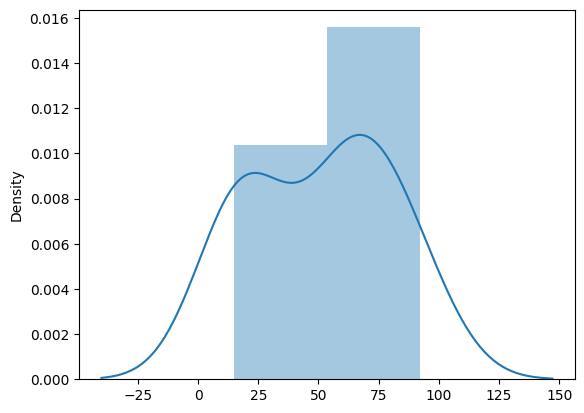

In [22]:
# df.topic_id,df.model
import seaborn as sns

sns.distplot(list(df.usefulness_1))

lets check the text input

In [9]:
# print('\n'.join(list(df.participant_criteria)))
print('\n'.join(list(df.participant_criteria.dropna())))

disgusting words with little social value
travel
Water melon
i could explain the relationship to a stranger
Relevance to context
cookie
healing
nutrition
parents 
indulge


In [12]:
import collections
# df.usefulness_1,df.usefulness_first_1
# df[["usefulness_first_1","usefulness_1","theme_representation"]].groupby("theme_representation").sum()

df.usefulness_first_1 = df.usefulness_first_1.astype(float)
df.usefulness_1 = df.usefulness_1.astype(float)
print(df[["usefulness_first_1","theme_representation"]].dropna().groupby("theme_representation").mean())
df[["usefulness_1","theme_representation"]].dropna().groupby("theme_representation").mean()

# df[df.topic_id=='11'].doc1

                                                    usefulness_first_1
theme_representation                                                  
five associated documents                                    60.166667
ten representative words                                     81.750000
ten representative words and five associated do...           71.153846


,usefulness_1
theme_representation,
five associated documents,54.8
ten representative words,77.0
ten representative words and five associated documents,66.0


In [14]:
udf = df[["usefulness_1","theme_representation"]].dropna()
udf['order'] = "last"
udf['rating'] = udf.usefulness_1

ldf = df[["usefulness_first_1","theme_representation"]].dropna()
ldf['order'] = "first"
ldf['rating'] = ldf.usefulness_first_1

use_df = pd.concat([udf,ldf])
use_df = use_df.drop(columns=["usefulness_first_1","usefulness_1"])
use_df

,theme_representation,order,rating
1,five associated documents,last,82.0
5,ten representative words,last,80.0
7,ten representative words and five associated d...,last,70.0
8,ten representative words and five associated d...,last,67.0
12,five associated documents,last,59.0
14,ten representative words,last,92.0
15,five associated documents,last,10.0
16,ten representative words,last,100.0
17,ten representative words,last,100.0
19,ten representative words,last,50.0


In [74]:
%%R -i use_df

# print(dim(use_df))
print(summary(analysis.variance <- aov(rating ~ as.factor(order) * as.factor(theme_representation),data=use_df)))
TukeyHSD(analysis.variance)

                                                 Df Sum Sq Mean Sq F value
as.factor(order)                                  1    621   621.3   1.359
as.factor(theme_representation)                   2   4642  2321.2   5.079
as.factor(order):as.factor(theme_representation)  2      1     0.5   0.001
Residuals                                        54  24680   457.0        
                                                  Pr(>F)   
as.factor(order)                                 0.24877   
as.factor(theme_representation)                  0.00953 **
as.factor(order):as.factor(theme_representation) 0.99895   
Residuals                                                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = rating ~ as.factor(order) * as.factor(theme_representation), data = use_df)

$`as.factor(order)`
                diff       lwr      upr     p adj
last-first -6.43

In [16]:
grp_df = use_df
grp_df['group'] = [str(i)+'-'+str(j) for i,j in zip(use_df.theme_representation,use_df.order)]

{'five associated documents-first',
 'five associated documents-last',
 'ten representative words and five associated documents-first',
 'ten representative words and five associated documents-last',
 'ten representative words-first',
 'ten representative words-last'}

In [78]:
%%R -i grp_df

# print(dim(grp_df$value))
group_mean<- aggregate(x= grp_df$rating,by = list(grp_df$group),FUN = mean)
print(var(group_mean))#between group variance

s <- 0
vals = c()
for (i in 1:60)
{
    v <- (grp_df$rating[i] - group_mean[group_mean$Group.1 == grp_df$group[i],"x"])^2
    s <- s + v
    
    # vals[i] <- v
}
print(s/60)
# print(var(vals))
# rownames(group_mean) <- group_mean$Group.1
# print(group_mean)

# gaov = aov(rating~group,data=grp_df)
# grandmean = as.vector(gaov$"(Intercept)"[[1]][1])
# within = summary(gaov)$"Error: Within"[[1]]$"Mean Sq" 
# dfRun = summary(gaov)$"Error: Run"[[1]]$"Df"
# dfWithin = summary(gaov)$"Error: Within"[[1]]$"Df"
# Run = summary(gaov)$"Error: Run"[[1]]$"Mean Sq"
# between = (Run-within)/((dfWithin/(dfRun+1))+1)
# print(c('between: ',between,as.vector(gaov$"(Intercept)"[[1]][1])))
# print(ls(gaov))

between <- 103.6474
within <- 411.3396

power.anova.test(groups = 6, between.var = between, within.var = within,power = .80,sig.level=0.05)

# print(summary(analysis.variance <- aov(rating ~ as.factor(group),data=grp_df)))
# print(TukeyHSD(analysis.variance))

        Group.1        x
Group.1      NA       NA
x            NA 103.6474
[1] 411.3396

     Balanced one-way analysis of variance power calculation 

         groups = 6
              n = 11.14112
    between.var = 103.6474
     within.var = 411.3396
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group



In addition: Warning message:
In var(group_mean) : NAs introduced by coercion
